In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('Jobis_3o3.csv')
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


In [3]:
# 수수료를 지불한 사람은 1, 그렇지 않은 사람은 0
df['has_paid'] = df['has_paid'].apply(lambda x: 1 if x else 0)

In [4]:
df['예상환급액-수수료'] = df['refund'] - df['fee']

In [5]:
# 예상환급액 대비 수수료 칼럼 추가
df['예상환급액_대비_수수료(%)'] = df['fee'] / df['refund'] * 100

In [6]:
# 소득 합계 칼럼 추가
df['income_합계'] = df['income_근로'] + df['income_사업'] + df['income_기타']

In [7]:
group1 = df[df['예상환급액-수수료']>0] # 보통의 경우
group2 = df[(df['예상환급액-수수료']<=0) & (df['has_paid']==1)] # 적자 혹은 수익이 없는데도 수수료를 결제한 경우 
group3 = df[(df['예상환급액-수수료']<=0) & (df['has_paid']==0)] # 적자 혹은 수익이 없기 때문에 수수료를 미결제한 경우

In [8]:
def age_category(age):
    category =''
    if age < 20:
        category = '10대'
    elif 20 <= age <= 23:
        category = '20대초반'
    elif 24 <= age <= 26:
        category = '20대중반'
    elif 27 <= age <= 29:
        category = '20대후반'
    elif 30 <= age <= 33:
        category = '30대초반'
    elif 34 <= age <= 36:
        category = '30대중반'
    elif 37 <= age <= 39:
        category = '30대후반'
    elif age < 50:
        category = '40대'
    elif age < 60:
        category = '50대'
    else:
        category = '60대이상'
    return category

In [9]:
group1['연령대'] = group1['age'].apply(age_category)

<ipython-input-9-6f8f8f33bf2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['연령대'] = group1['age'].apply(age_category)


In [10]:
group1['gender'].value_counts()

M    50416
F    49432
-       22
Name: gender, dtype: int64

In [11]:
# 성별 결측치가 있는 행 제거
group1 = group1[group1['gender']!='-']

In [12]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99848 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              99848 non-null  float64
 1   gender           99848 non-null  object 
 2   year             99848 non-null  int64  
 3   refund           99848 non-null  float64
 4   fee              99848 non-null  float64
 5   has_paid         99848 non-null  int64  
 6   income_근로        40744 non-null  float64
 7   income_사업        78149 non-null  float64
 8   income_기타        25223 non-null  float64
 9   예상환급액-수수료        99848 non-null  float64
 10  예상환급액_대비_수수료(%)  99848 non-null  float64
 11  income_합계        5965 non-null   float64
 12  연령대              99848 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 10.7+ MB


In [13]:
group1.loc[:,'year'] = group1.loc[:,'year'].astype(str)

In [14]:
group1.head(1)

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액-수수료,예상환급액_대비_수수료(%),income_합계,연령대
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,NaN,4600.0,8.0,NaN,20대후반


## 그래프 그려보기
hue는 항상 has_paid
### 단일변수
#### 수치형 
- histplot: refund, fee, income_근로, income_사업, income_기타, 예상환급액-수수료, 예상환급액_대비_수수료(%),income_합계
#### 범주형
- countplot: year

### 다변수
#### 연속형/연속형
- scatterplot: 없음
- lmplot: 없음
- pairplot: 없음
#### 범주형/연속형
- barplot, boxplot: (year, ), (has_paid, )

#### 연령대별, 성별별로 segment를 나눠 분석하기
- 10대 남성
- 10대 여성

- 20대초반 남성
- 20대초반 여성
- 20대중반 남성
- 20대중반 여성
- 20대후반 남성
- 20대후반 여성

- 30대초반 남성
- 30대초반 여성
- 30대중반 남성
- 30대중반 여성
- 30대후반 남성
- 30대후반 여성

- 40대 남성
- 40대 여성

- 50대 남성
- 50대 여성

- 60대이상 남성
- 60대이상 여성

#### 제안해야하는 문구 예시
- 30대초반 남성:
        예상환급액-수수료가 10,000원 이상인 사람의 결제율이 그렇지 않은 사람보다 더 높으므로, 예상환급액-수수료가 10,000원 이하의 사람들을 대상으로 수수료를 다소 인하하여 10,000원 이상을 만들어 결제를 유도한다.
- 30대후반 여성:
        전체 소득 대비 사업소득의 비율이 30% 이상인 경우 그렇지 않은 사람들보다 결제율이 높으므로 그들에게 결제를 유도하는 push 메시지를 보낸다.

In [17]:
# 20대초반 남성의 특성
남성_20대_초반 = group1[(group1['연령대']=='20대초반') & (group1['gender']=='M')]
남성_20대_초반

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액-수수료,예상환급액_대비_수수료(%),income_합계,연령대
7,23.0,M,2017,10000.0,400.0,1,186000.0,74000.0,NaN,9600.0,4.000000,NaN,20대초반
9,22.0,M,2018,51000.0,900.0,0,NaN,NaN,153000.0,50100.0,1.764706,NaN,20대초반
19,22.0,M,2020,396000.0,15700.0,0,873000.0,2385000.0,NaN,380300.0,3.964646,NaN,20대초반
33,22.0,M,2018,69000.0,400.0,1,NaN,NaN,NaN,68600.0,0.579710,NaN,20대초반
56,23.0,M,2017,51000.0,900.0,0,NaN,308000.0,NaN,50100.0,1.764706,NaN,20대초반
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99932,22.0,M,2020,18000.0,400.0,1,NaN,108000.0,NaN,17600.0,2.222222,NaN,20대초반
99935,23.0,M,2019,435000.0,17000.0,0,NaN,2619000.0,NaN,418000.0,3.908046,NaN,20대초반
99937,23.0,M,2017,7000.0,400.0,1,NaN,43000.0,NaN,6600.0,5.714286,NaN,20대초반
99958,23.0,M,2019,148000.0,4300.0,0,NaN,NaN,NaN,143700.0,2.905405,NaN,20대초반


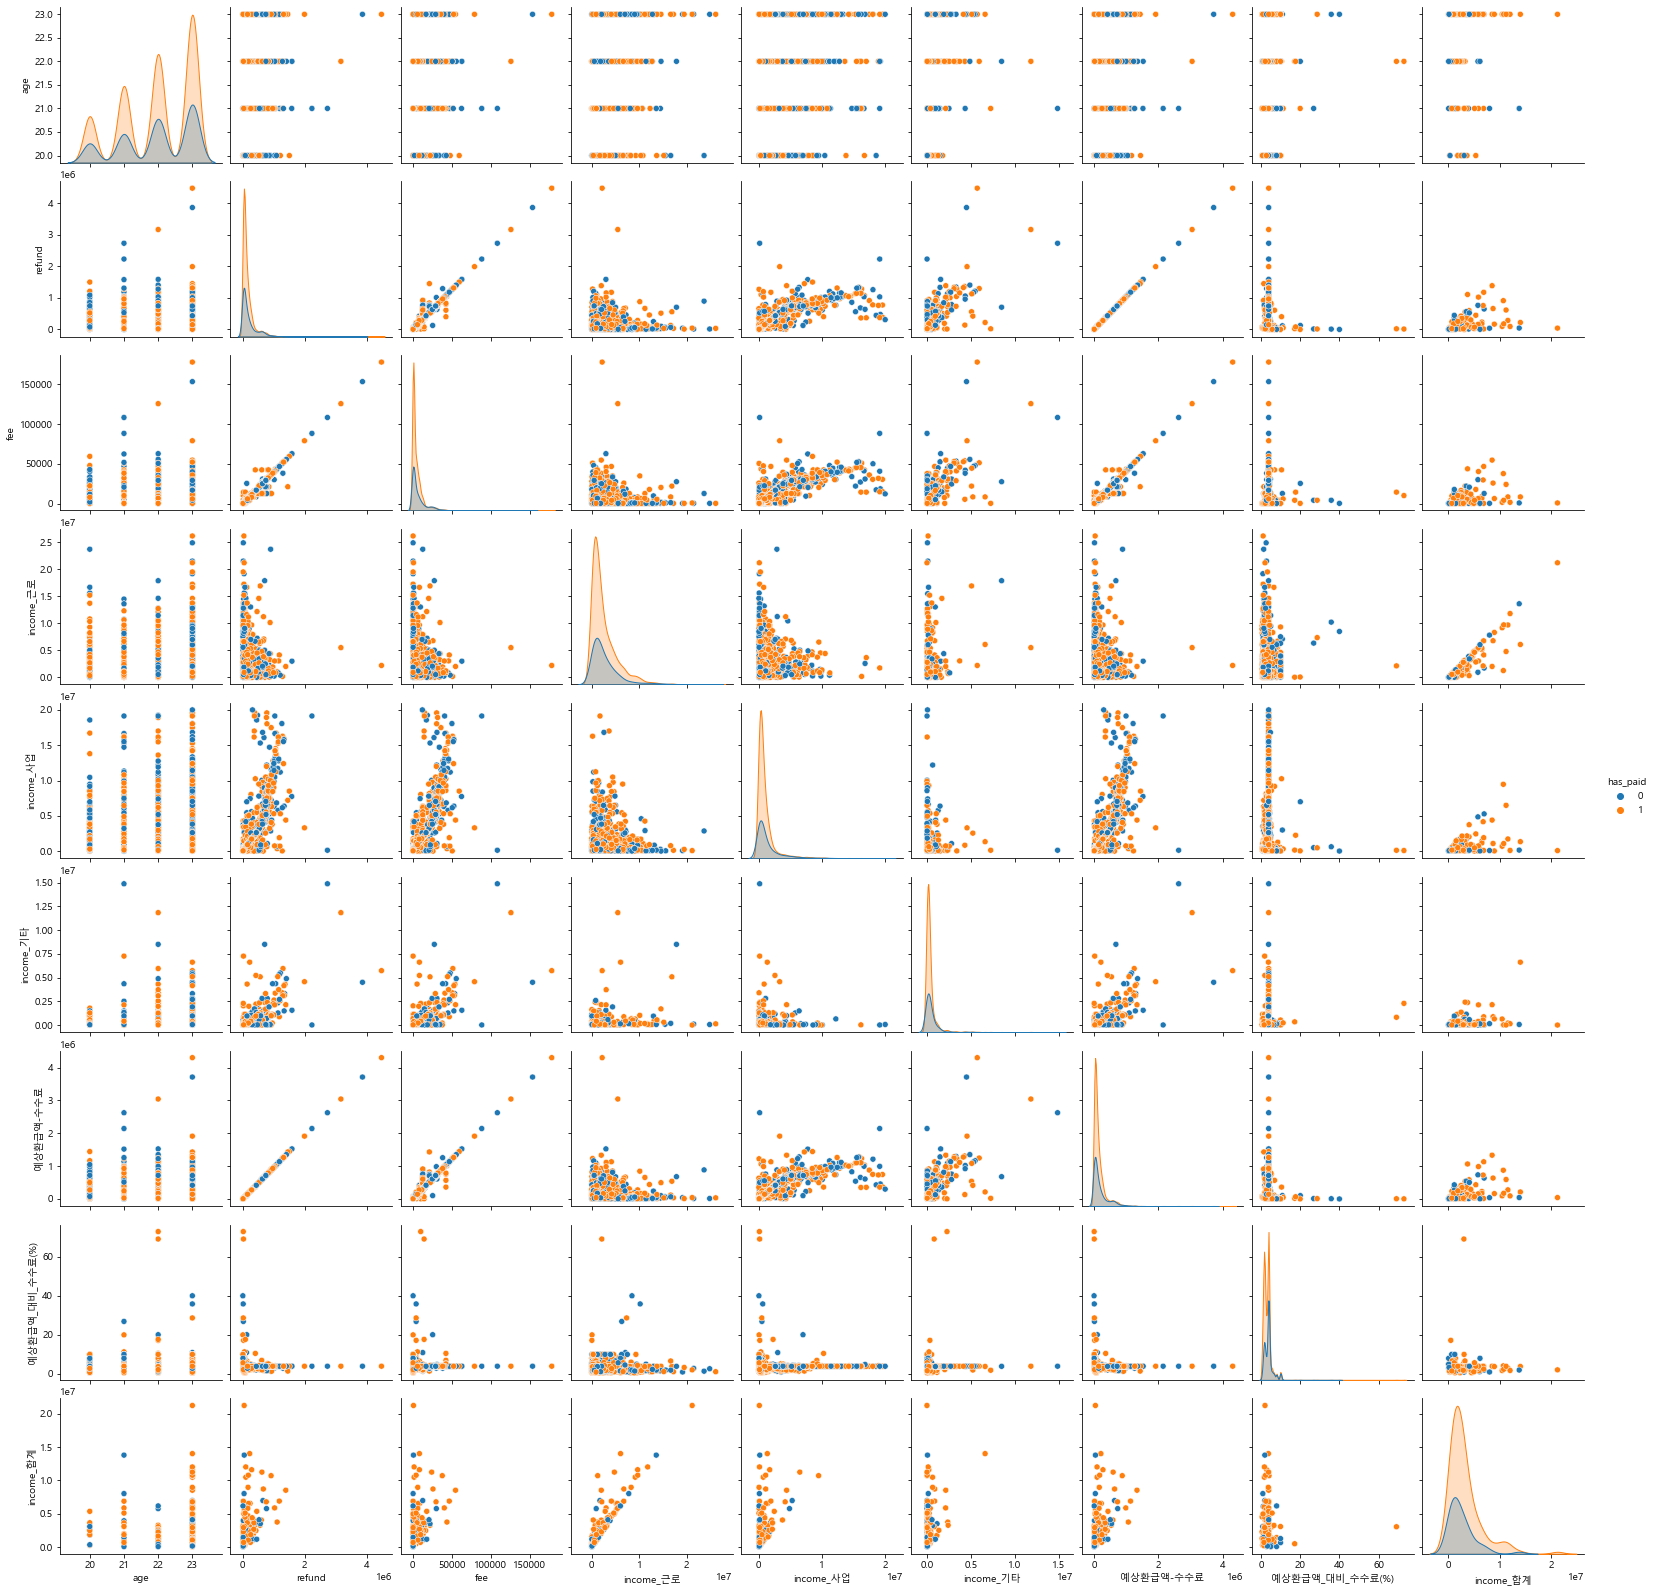

In [18]:
sns.pairplot(남성_20대_초반, hue='has_paid')

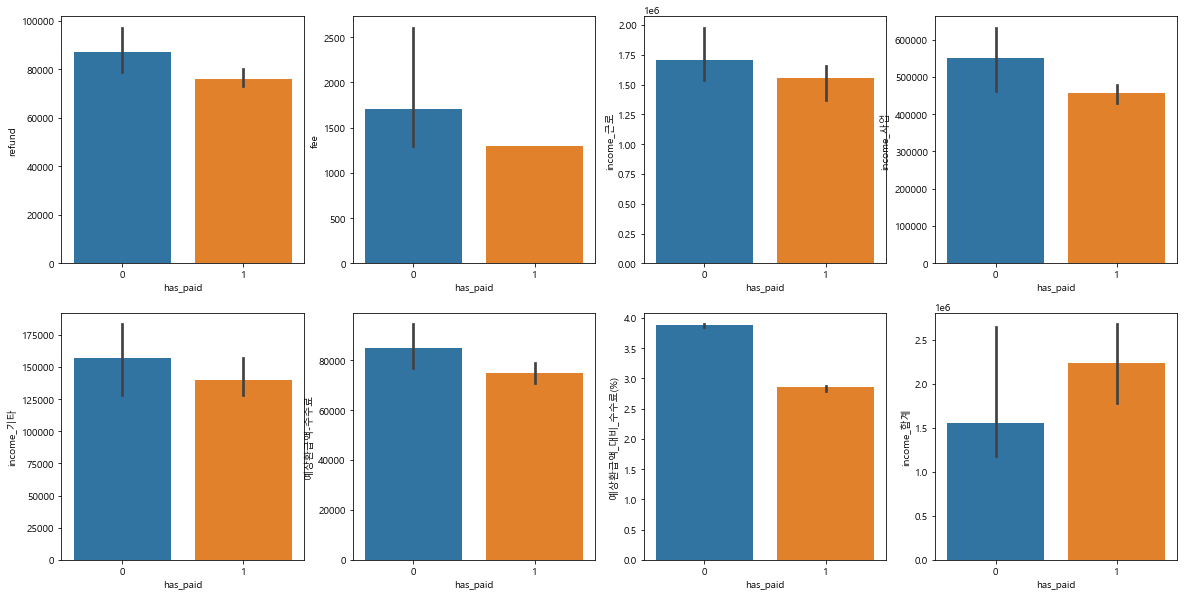

In [19]:
quantitative_variables = ['refund', 'fee', 'income_근로', 'income_사업', 'income_기타', '예상환급액-수수료', '예상환급액_대비_수수료(%)','income_합계']
plt.figure(figsize=(20,10))
for i, var in enumerate(quantitative_variables, start=1):
    plt.subplot(2,4,i)
    sns.barplot(data=남성_20대_초반, x='has_paid', y = var, estimator=np.median)

In [20]:
# 40대 여성의 특성
여성_40대_초반 = group1[(group1['연령대']=='40대') & (group1['gender']=='F')]

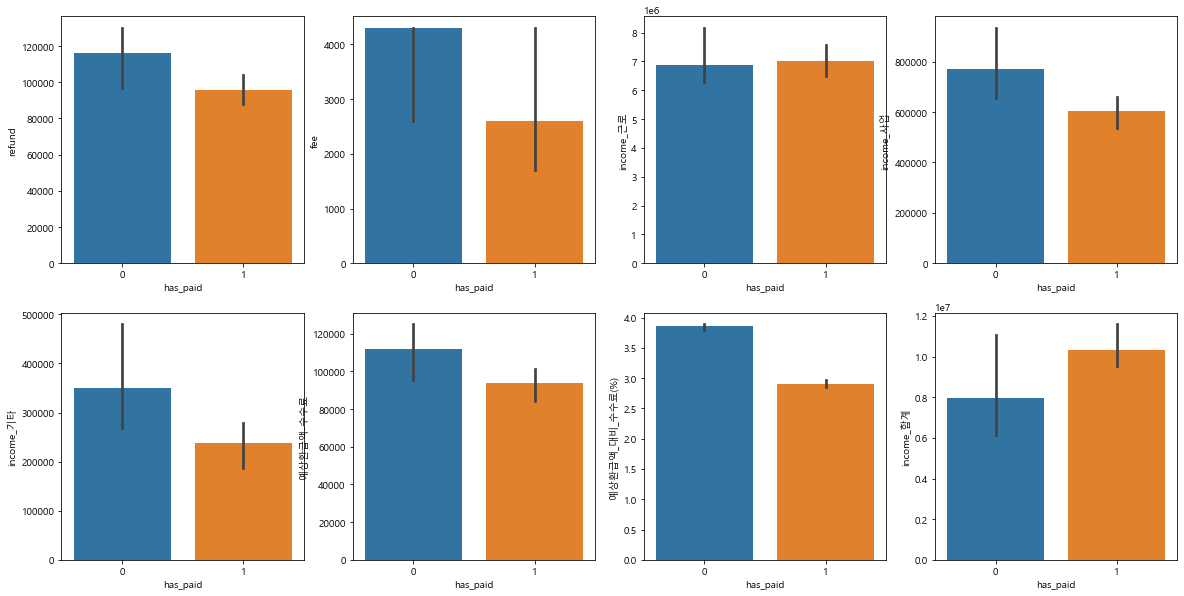

In [21]:
quantitative_variables = ['refund', 'fee', 'income_근로', 'income_사업', 'income_기타', '예상환급액-수수료', '예상환급액_대비_수수료(%)','income_합계']
plt.figure(figsize=(20,10))
for i, var in enumerate(quantitative_variables, start=1):
    plt.subplot(2,4,i)
    sns.barplot(data=여성_40대_초반, x='has_paid', y = var, estimator=np.median)

- 어떠한 차이를 발견하기가 쉽지 않다..

In [46]:
# 연령대별 결제율
group1.groupby('연령대')[['has_paid']].mean()

,has_paid
연령대,
10대,0.693271
20대중반,0.653034
20대초반,0.654702
20대후반,0.653467
30대중반,0.622090
30대초반,0.642071
30대후반,0.632501
40대,0.610149
50대,0.617062


<AxesSubplot:xlabel='연령대', ylabel='has_paid'>

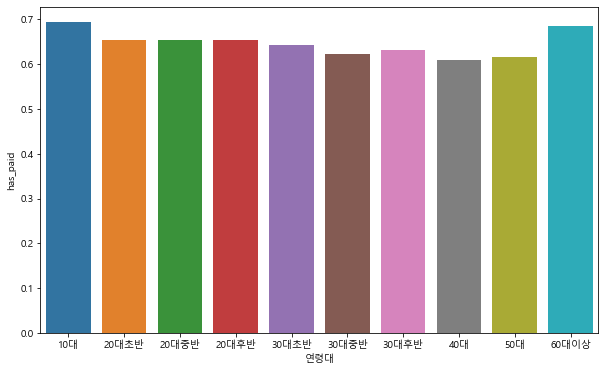

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=group1.groupby('연령대')[['has_paid']].mean(), x=group1.groupby('연령대')[['has_paid']].mean().index,y='has_paid',
           order = ['10대','20대초반','20대중반','20대후반','30대초반','30대중반','30대후반','40대','50대','60대이상'])

<AxesSubplot:xlabel='year', ylabel='has_paid'>

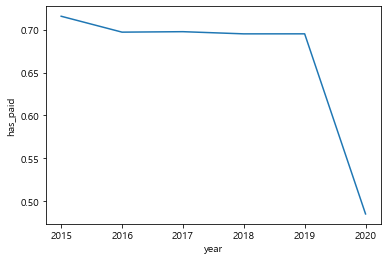

In [49]:
# 귀속연도별 결제율
sns.lineplot(data=group1.groupby('year')[['has_paid']].mean(), x='year',y='has_paid')

- 2020년에 결제를 잘 하지 않음

<AxesSubplot:xlabel='year', ylabel='fee'>

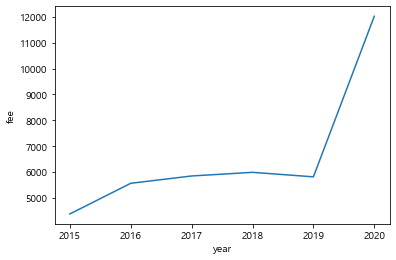

In [67]:
# 귀속연도별 결제금액 평균
sns.lineplot(data=group1.groupby('year')[['fee']].mean(), x='year',y='fee')

<AxesSubplot:xlabel='year', ylabel='fee'>

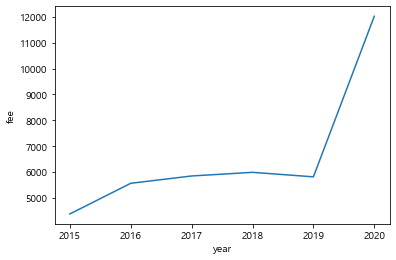

In [68]:
# 귀속연도별 결제금액 합
sns.lineplot(data=group1.groupby('year')[['fee']].mean(), x='year',y='fee', estimator='sum')

- 2020년의 결제율이 급감했지만 결제금액의 평균은 급증함

In [43]:
# 2020년의 특징은?
group1.groupby('year').agg(['mean','median'])

age                refund                     fee          \
           mean median           mean    median          mean  median   
year                                                                    
2015  30.751144   28.0  164650.482969   79500.0   4383.680732  3000.0   
2016  30.549583   28.0  171207.973518   83000.0   5567.199194  1700.0   
2017  29.633961   27.0  176983.294239   87000.0   5849.854111  1700.0   
2018  28.835045   27.0  180110.888410   88000.0   5990.614822  2100.0   
2019  28.225042   26.0  174143.523192   89000.0   5816.774814  2100.0   
2020  28.147958   26.0  314857.088783  159000.0  12022.029693  6000.0   

      has_paid            income_근로                income_사업            \
          mean median          mean     median          mean    median   
year                                                                     
2015  0.715557      1  7.177557e+06  3944000.0  1.190479e+06  525500.0   
2016  0.697035      1  5.559862e+06  3748500.0  1.185304e+06  504000.0   
2017  0.697580      1  5.571461e+06  3695000.0  1.234672e+06  534000.0   
2018  0.695044      1  6.434533e+06  4563000.0  1.246897e+06  550000.0   
2019  0.695073      1  7.002745e+06  5102000.0  1.173373e+06  553000.0   
2020  0.485343      0  6.814642e+06  4937000.0  2.362015e+06  979500.0   

          income_기타                예상환급액-수수료           예상환급액_대비_수수료(%)  \
               mean    median           mean    median            mean   
year                                                                     
2015  353550.135501  116000.0  160266.802237   75700.0        2.989211   
2016  629452.388105  213000.0  165640.774324   79900.0        3.288181   
2017  626842.380952  223000.0  171133.440128   83700.0        3.299701   
2018  590139.896373  200000.0  174120.273588   85300.0        3.292356   
2019  510508.223387  171000.0  168326.748378   86400.0        3.282880   
2020  802807.476067  213000.0  302835.059091  153000.0        3.357364   

                   income_합계              
        median          mean      median  
year                                      
2015  2.666667  1.589152e+07  13886000.0  
2016  2.905405  8.664541e+06   6845000.0  
2017  2.926829  8.551899e+06   6428000.0  
2018  2.951389  9.075225e+06   6927500.0  
2019  2.931034  9.722163e+06   7683000.0  
2020  3.884298  8.897043e+06   6956000.0

- 환급액이 높음
- 수수료가 매우 높음
- 결제율이 낮음
- 사업소득이 매우 높음
- 기타소득이 높음
- 예상환급액 대비 수수료가 높음

## 연령별/성별별이 아닌, 분석 방법론을 바꾸어야 할 필요가 있음
- 예상환금액별, 수수료별, 근로소득별, 사업소득별, 기타소득별 각 칼럼별로 적절한 segment를 나누어 수수료 결제율을 확인해보자

In [46]:
group1_paid = group1[group1['has_paid']==1]
group1_unpaid = group1[group1['has_paid']==0]